In [12]:
import pandas as pd

df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
df.drop(['Serial No.','University Rating'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE Score         500 non-null    int64  
 1   TOEFL Score       500 non-null    int64  
 2   SOP               500 non-null    float64
 3   LOR               500 non-null    float64
 4   CGPA              500 non-null    float64
 5   Research          500 non-null    int64  
 6   Chance of Admit   500 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [15]:
df.isnull().sum()

GRE Score           0
TOEFL Score         0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

In [16]:
df.shape

(500, 7)

In [17]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [18]:
X

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,337,118,4.5,4.5,9.65,1
1,324,107,4.0,4.5,8.87,1
2,316,104,3.0,3.5,8.00,1
3,322,110,3.5,2.5,8.67,1
4,314,103,2.0,3.0,8.21,0
...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,1
496,337,117,5.0,5.0,9.87,1
497,330,120,4.5,5.0,9.56,1
498,312,103,4.0,5.0,8.43,0


In [19]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train,y_train,X_test,y_test

(     GRE Score  TOEFL Score  SOP  LOR   CGPA  Research
 249        321          111  3.5   4.0  8.83         1
 433        316          111  4.0   5.0  8.54         0
 19         303          102  3.5   3.0  8.50         0
 322        314          107  2.5   4.0  8.27         0
 332        308          106  3.5   2.5  8.21         1
 ..         ...          ...  ...   ...   ...       ...
 106        329          111  4.5   4.5  9.18         1
 270        306          105  2.5   3.0  8.22         1
 348        302           99  2.0   2.0  7.25         0
 435        309          105  2.5   4.0  7.68         0
 102        314          106  4.0   3.5  8.25         0
 
 [400 rows x 6 columns],
 249    0.77
 433    0.71
 19     0.62
 322    0.72
 332    0.75
        ... 
 106    0.87
 270    0.72
 348    0.57
 435    0.55
 102    0.62
 Name: Chance of Admit , Length: 400, dtype: float64,
      GRE Score  TOEFL Score  SOP  LOR   CGPA  Research
 361        334          116  4.0   3.5  9.54   

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [90]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=6))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

d:\RazonCoding\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 7)              │            49 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(loss='mean_squared_error',optimizer='adam')


In [93]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.4166 - val_loss: 1.2866
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1964 - val_loss: 1.0555
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9320 - val_loss: 0.8374
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7577 - val_loss: 0.6404
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5205 - val_loss: 0.4827
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4037 - val_loss: 0.3694
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3110 - val_loss: 0.2925
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2313 - val_loss: 0.2416
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1913 - val_loss: 0.2035
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1544 - val_loss: 0.1736
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1271 - val_loss: 0.1497
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1

In [94]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5671483231799808

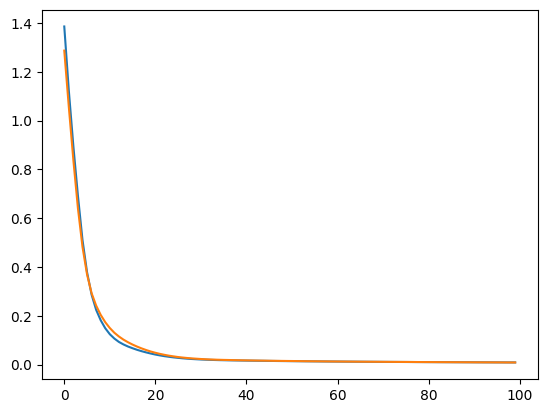

In [96]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])